In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pyMELTScalc as M
import PySulfSat as ss

sys.path.append('G:/My Drive/2022/MELTS/MELTS_Matlab-master/package')

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

In [9]:
Exp = pd.read_excel('NeaveExperiments\Villiger2007.xlsx')
Elements = ['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MgO_Liq',
            'CaO_Liq', 'Na2O_Liq', 'K2O_Liq']

#Pet = ss.import_data(filename = 'NeaveExperiments/Villiger2007_Petrolog_noOpx.xlsx', Petrolog = True)

KeyError: 'Ni_Liq'

In [3]:
bulk = {'SiO2_Liq': Exp['SiO2_Liq'].loc[0], 
        'TiO2_Liq': Exp['TiO2_Liq'].loc[0], 
        'Al2O3_Liq': Exp['Al2O3_Liq'].loc[0], 
        'FeOt_Liq': Exp['FeOt_Liq'].loc[0], 
        'MnO_Liq': Exp['MnO_Liq'].loc[0], 
        'MgO_Liq': Exp['MgO_Liq'].loc[0], 
        'CaO_Liq': Exp['CaO_Liq'].loc[0], 
        'Na2O_Liq': Exp['Na2O_Liq'].loc[0], 
        'K2O_Liq': Exp['K2O_Liq'].loc[0],
        'P2O5_Liq': 0.0,
        'H2O_Liq': 0.05, 
        'CO2_Liq': 0.0,
       'Fe3Fet_Liq': 0.17}

#49.39	1.53	14.08	0.06	10.25	0.18	10.32	12.05	1.95	0.21	0.17


In [4]:
#Pet

In [5]:
Exp[Elements] = 100*Exp[Elements].values/np.nansum(Exp[Elements], axis = 1).reshape(8,1)
#Pet[Elements] = 100*Pet[Elements].values/np.nansum(Pet[Elements], axis = 1).reshape(71,1)

In [6]:
P_bar = np.array([4000,7000,10000,1000])

Results_Holland = M.multi_path(Model = "Holland", comp = bulk,
                       T_end_C = 1000, dt_C = 2, 
                       P_bar = P_bar, find_liquidus = True,
                       H2O_Liq = 0.2,
                       Frac_solid = True, Frac_fluid = True,
                      fO2_buffer = "NNO", fO2_offset = 0)

Results_MELTS = M.multi_path(Model = "MELTSv1.2.0", comp = bulk,
                       T_end_C = 1000, dt_C = 2, 
                       P_bar = P_bar, find_liquidus = True,
                       H2O_Liq = 0.2,
                       Frac_solid = True, Frac_fluid = True,
                      fO2_buffer = "NNO", fO2_offset = 0)

  0%|          | 0/1 [00:00<?, ?it/s]

Running Holland calculations 0 to 3.0 ... Complete (time taken = 56.1 seconds)


  0%|          | 0/1 [00:00<?, ?it/s]

Running MELTSv1.2.0 calculations 0 to 3.0 ... Complete (time taken = 39.8 seconds)


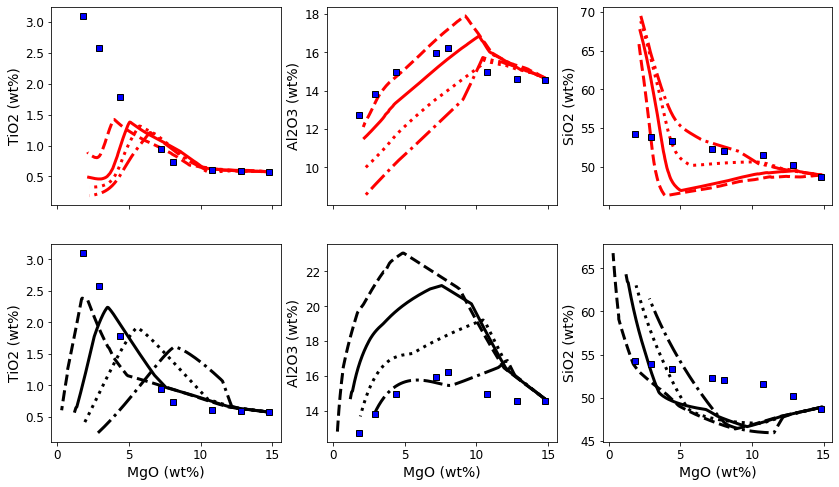

In [11]:
f, a = plt.subplots(2,3, figsize = (14,8), sharex = True)

y = ['TiO2_Liq', 'Al2O3_Liq', 'SiO2_Liq']

for index in Results_Holland:
    Results_Holland[index]['liq'][Elements] = 100*Results_Holland[index]['liq'][Elements].values/np.nansum(Results_Holland[index]['liq'][Elements], axis = 1).reshape(len(Results_Holland[index]['liq']['SiO2_Liq']),1)
    Results_MELTS[index]['All'][Elements] = 100*Results_MELTS[index]['All'][Elements].values/np.nansum(Results_MELTS[index]['All'][Elements], axis = 1).reshape(len(Results_MELTS[index]['All']['SiO2_Liq']),1)

lines = [':', '-', '--', '-.']    

for i in range(3):
    for j in range(len(P_bar)):
        a[0][i].plot(Results_Holland['index = ' + str(int(j))]['liq']['MgO_Liq'],
             Results_Holland['index = ' + str(int(j))]['liq'][y[i]], lines[j], linewidth = 3, color = 'r')  
        a[1][i].plot(Results_MELTS['index = ' + str(int(j))]['All']['MgO_Liq'],
             Results_MELTS['index = ' + str(int(j))]['All'][y[i]], lines[j], linewidth = 3, color = 'k')
    a[0][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[0][i].set_ylabel(y[i][:-4] + ' (wt%)')
    
    a[1][i].plot(Exp['MgO_Liq'], Exp[y[i]], 'sk',
                markerfacecolor = 'blue')
    a[1][i].set_ylabel(y[i][:-4] + ' (wt%)')
    
    a[1][i].set_xlabel('MgO (wt%)')
    
plt.savefig("Villiger.eps", dpi = 300, bbox_inches='tight')  

In [8]:
import pickle

with open('Results_Holland.pck', 'wb') as f:
    pickle.dump(Results_Holland,f)